<a href="https://colab.research.google.com/github/Ove4/Data-Classification-Summarization-Viral-Social-Media-Trends-Engagement-Analysis-using-IBM-Granite/blob/main/CapstoneProjectIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###
### 1. Setup & Import Library
### =========================

In [ ]:
!pip install langchain_community
!pip install replicate
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from langchain.llms import Replicate
from google.colab import userdata

###
### 2. API Token Setup
### =========================

In [ ]:
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup (IBM Granite Instruct)
model = "ibm-granite/granite-3.3-8b-instruct"
granite = Replicate(model=model, replicate_api_token=api_token)

###
### 3. Load Dataset
### =========================

In [ ]:
df = pd.read_csv("Cleaned_Viral_Social_Media_Trends.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5000, 11)


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


###
### 4. Exploratory Data Analysis (EDA)
### =========================

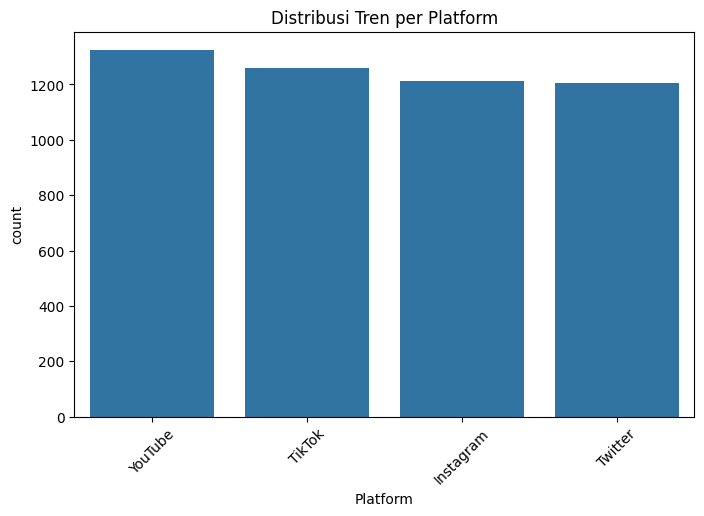

In [ ]:
# Distribusi platform
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index)
plt.title("Distribusi Tren per Platform")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Distribusi kategori jika ada kolom Category
if "Category" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
    plt.title("Distribusi Tren per Kategori")
    plt.xticks(rotation=45)
    plt.show()

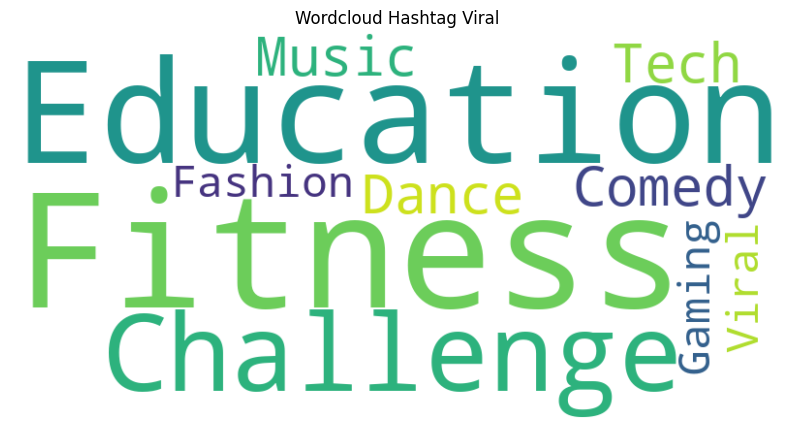

In [ ]:
# Wordcloud hashtag
text = " ".join(df["Hashtag"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Hashtag Viral")
plt.show()

###
### 5. Classification with Granite
### =========================

In [ ]:
# Ambil sampel 5 deskripsi tren
sample_trends = df["Hashtag"].dropna().head(5).tolist()
trends_text = "\n".join([f"Trend {i}: {trend}"for i, trend in enumerate(sample_trends, 1)])

classification_prompt = f"""
Classify these social media trends into categories
[Entertainment, Politics, Education, Technology, Lifestyle]
and determine engagement level (High/Low) based on context.

{trends_text}
"""

classification_result = granite.invoke(classification_prompt)
print("=== Classification Result ===")
print(classification_result)

=== Classification Result ===
- Trend 1: #Challenge (Entertainment, High engagement)
  - This hashtag typically refers to viral challenges or dance trends, often seen on platforms like TikTok and Instagram, where users participate and share videos. High engagement is expected due to the participatory nature of these challenges.

- Trend 2: #Education (Education, High engagement)
  - Hashtag #Education usually encompasses discussions, resources, and learning materials shared on social media. Given the increasing focus on online learning and remote education, this category tends to generate considerable interest and engagement.

- Trend 3: #Challenge (Entertainment, High engagement)
  - Similar to Trend 1, this represents another entertainment-based challenge, possibly involving different formats or platforms. High engagement is likely, as people enjoy participating in and sharing such trends.

- Trend 4: #Education (Education, High engagement)
  - Another instance of the #Education cate

###
### 6. Summarization with Granite
### =========================

In [ ]:
summarization_prompt = f"""
Summarize the following viral social media trends into a structured format:

Headings:
- Main Theme
- Engagement Highlight
- Key Insight

{trends_text}
"""

summarization_result = granite.invoke(summarization_prompt)
print("=== Summarization Result ===")
print(summarization_result)

=== Summarization Result ===
**Trend 1: #Challenge**

- **Main Theme:** Participation in viral challenges to raise awareness or for entertainment.
- **Engagement Highlight:** High user-generated content with significant participation rates across demographics.
- **Key Insight:** Challenges serve as powerful tools for spreading messages quickly and engaging audiences, often leading to real-world impact or charitable contributions.

---

**Trend 2: #Education**

- **Main Theme:** Sharing educational content, often in bite-sized formats, to promote learning and knowledge dissemination.
- **Engagement Highlight:** Content creators and educational institutions experience high engagement as users seek informative and easily digestible material.
- **Key Insight:** The trend highlights a growing interest in lifelong learning and the democratization of education through accessible digital platforms.

---

**Trend 3: #Challenge**

- **Main Theme:** Similar to Trend 1, this focuses on challenges 

###
### 7. Insights & Findings
### =========================

In [ ]:
print("insight & Findings")
print("""
1. Semua tren yang teridentifikasi termasuk dalam kategori Entertainment (#Challenge, #Dance) dan Education (#Education).
   - Politics, Technology, dan Lifestyle tidak muncul dalam sampel tren.
2. Semua tren memiliki engagement level tinggi, dipicu sifat shareable seperti challenge, dance, dan storytelling.
3. Tren Entertainment (challenge, dance) → mendorong partisipasi komunitas dan menciptakan pengalaman kolektif.
4. Tren Education → menyajikan materi singkat & storytelling yang mudah dipahami, mendorong minat pada pembelajaran digital.
5. Pola umum: Entertainment = engagement lewat keseruan, Education = engagement lewat informasi & storytelling.
""")

insight & Findings

1. Semua tren yang teridentifikasi termasuk dalam kategori Entertainment (#Challenge, #Dance) dan Education (#Education).
   - Politics, Technology, dan Lifestyle tidak muncul dalam sampel tren.
2. Semua tren memiliki engagement level tinggi, dipicu sifat shareable seperti challenge, dance, dan storytelling.
3. Tren Entertainment (challenge, dance) → mendorong partisipasi komunitas dan menciptakan pengalaman kolektif.
4. Tren Education → menyajikan materi singkat & storytelling yang mudah dipahami, mendorong minat pada pembelajaran digital.
5. Pola umum: Entertainment = engagement lewat keseruan, Education = engagement lewat informasi & storytelling.



###
### 8. Recommendations
### =========================

In [ ]:
print("Recommendations")
print("""
1. Untuk tren hiburan (#Challenge, #Dance):
   - Brand bisa membuat atau mensponsori challenge/dance.
   - Kolaborasi dengan influencer penting untuk mempercepat viralitas.
   - Tambahkan elemen sosial/charity agar lebih berdampak.
2. Untuk tren edukasi (#Education):
   - Gunakan format pendek & visual (infografis, reels, shorts).
   - Cocok untuk lembaga pendidikan, NGO, atau brand teknologi.
   - Terapkan storytelling agar pesan lebih relatable & mudah diingat.
3. Strategi cross-platform:
   - Entertainment → TikTok & Instagram.
   - Education → Instagram Reels, YouTube Shorts, LinkedIn.
4. Optimasi engagement:
   - Dorong user-generated content (UGC).
   - Gunakan hashtag singkat & mudah diingat.
   - Monitor tren real-time agar brand cepat masuk momentum.
""")

Recommendations

1. Untuk tren hiburan (#Challenge, #Dance):
   - Brand bisa membuat atau mensponsori challenge/dance.
   - Kolaborasi dengan influencer penting untuk mempercepat viralitas.
   - Tambahkan elemen sosial/charity agar lebih berdampak.
2. Untuk tren edukasi (#Education):
   - Gunakan format pendek & visual (infografis, reels, shorts).
   - Cocok untuk lembaga pendidikan, NGO, atau brand teknologi.
   - Terapkan storytelling agar pesan lebih relatable & mudah diingat.
3. Strategi cross-platform:
   - Entertainment → TikTok & Instagram.
   - Education → Instagram Reels, YouTube Shorts, LinkedIn.
4. Optimasi engagement:
   - Dorong user-generated content (UGC).
   - Gunakan hashtag singkat & mudah diingat.
   - Monitor tren real-time agar brand cepat masuk momentum.

